In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

--2020-07-21 23:08:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.166.16, 172.217.167.16, 216.58.221.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.166.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   397KB/s    in 3m 24s  

2020-07-21 23:12:07 (422 KB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
from tensorflow.keras import Model
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

import os
import zipfile

local_zip = '/home/srijan/Downloads/Dataset-20200512T115103Z-001.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/home/srijan/Downloads')
zip_ref.close()
base_dir = '/home/srijan/Downloads/Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training no spill/spill pictures
train_no_spill_dir = os.path.join(train_dir, 'no spill images train')
train_spill_dir = os.path.join(train_dir, 'spill images train')

# Directory with our validation no spill/spill pictures
validation_no_spill_dir = os.path.join(validation_dir, 'no spill images test')
validation_spill_dir = os.path.join(validation_dir, 'spill images test')


last layer output shape:  (None, 7, 7, 768)


In [3]:
train_no_spill_fnames = os.listdir( train_no_spill_dir )
train_spill_fnames = os.listdir( train_spill_dir )

print(train_no_spill_fnames[:10])
print(train_spill_fnames[:10])

['IMG_20191204_115352.jpg', 'IMG_20191204_114329.jpg', 'IMG_20191204_153843.jpg', 'IMG_20191204_114135.jpg', 'IMG_20191204_153141.jpg', 'IMG_20191204_153904.jpg', 'IMG_20191204_115327.jpg', 'IMG_20191204_153924.jpg', 'IMG_20191204_115424.jpg', 'IMG_20191204_152945.jpg']
['IMG_20191204_153532.jpg', 'IMG_20191204_114749.jpg', 'IMG_20191204_154320.jpg', 'IMG_20191204_115903.jpg', 'IMG_20191204_154245.jpg', 'IMG_20191204_120742.jpg', 'IMG_20191204_153610.jpg', 'IMG_20191204_120531.jpg', 'IMG_20200714_140203.jpg', 'IMG_20191204_120631.jpg']


In [4]:
print('total training no spill images :', len(os.listdir(      train_no_spill_dir ) ))
print('total training spill images :', len(os.listdir(      train_spill_dir ) ))

print('total validation no spill images :', len(os.listdir( validation_no_spill_dir ) ))
print('total validation spill images :', len(os.listdir( validation_spill_dir ) ))

total training no spill images : 53
total training spill images : 59
total validation no spill images : 15
total validation spill images : 15


In [5]:
import tensorflow as tf

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0005),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=11,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=7,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 112 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=25,
                              validation_steps=4,
                              verbose=2)

Epoch 1/25
10/10 - 29s - loss: 0.2655 - accuracy: 0.9010 - val_loss: 0.5336 - val_accuracy: 0.7857
Epoch 2/25
10/10 - 28s - loss: 0.2699 - accuracy: 0.9109 - val_loss: 0.4399 - val_accuracy: 0.8571
Epoch 3/25
10/10 - 29s - loss: 0.3481 - accuracy: 0.9010 - val_loss: 0.9317 - val_accuracy: 0.7500
Epoch 4/25
10/10 - 29s - loss: 0.2038 - accuracy: 0.9208 - val_loss: 1.3361 - val_accuracy: 0.7500
Epoch 5/25
10/10 - 29s - loss: 0.3340 - accuracy: 0.8911 - val_loss: 0.8541 - val_accuracy: 0.7143
Epoch 6/25
10/10 - 30s - loss: 0.2303 - accuracy: 0.9273 - val_loss: 0.8664 - val_accuracy: 0.7500
Epoch 7/25
10/10 - 30s - loss: 0.2058 - accuracy: 0.9307 - val_loss: 0.2842 - val_accuracy: 0.8929
Epoch 8/25
10/10 - 29s - loss: 0.1962 - accuracy: 0.9010 - val_loss: 0.7808 - val_accuracy: 0.6786
Epoch 9/25
10/10 - 30s - loss: 0.1583 - accuracy: 0.9455 - val_loss: 0.6676 - val_accuracy: 0.7500
Epoch 10/25
10/10 - 29s - loss: 0.1339 - accuracy: 0.9604 - val_loss: 0.3744 - val_accuracy: 0.8214
Epoch 11/

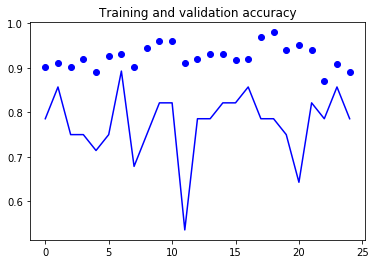

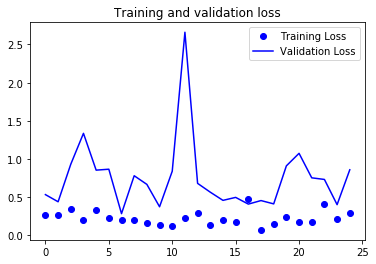

[[9.9999940e-01]
 [8.6446708e-01]
 [4.5277214e-01]
 [4.1827163e-01]
 [2.6130700e-01]
 [9.8830253e-01]
 [5.0159701e-04]
 [9.9646628e-01]
 [9.9980968e-01]
 [9.9997139e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.6831369e-01]
 [9.9944299e-01]
 [9.6524636e-05]
 [9.9995565e-01]
 [2.6370989e-02]
 [9.9675983e-01]
 [9.7122228e-01]
 [9.1205442e-01]
 [4.7656555e-05]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999642e-01]
 [3.6551809e-01]
 [8.7798733e-01]
 [9.9999440e-01]
 [9.9856937e-01]
 [9.9920815e-01]
 [7.7174890e-01]]


In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

classes = model.predict(validation_generator, batch_size=10)
print(classes)